In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_file = Path("C:/Users/ansankar/Documents/PMR.csv")

In [4]:
data_file_df=pd.read_csv(data_file)
data_file_df.head()

,Indicator Name,Geography,Region,Year,Category,Subcategory,Numerator,Denominator,Rate,Lower 95% Confidence Limit,Upper 95% Confidence Limit,Unnamed: 11
0,Pregnancy-Related Mortality Ratio,United States,NaN,2009,Total Population,Total population,NaN,NaN,17.8,NaN,NaN,NaN
1,Pregnancy-Related Mortality Ratio,California,NaN,2009,Total Population,Total population,90,526774.0,17.1,13.7,21,NaN
2,Pregnancy-Related Mortality Ratio,United States,NaN,2010,Total Population,Total population,NaN,NaN,16.7,NaN,NaN,NaN
3,Pregnancy-Related Mortality Ratio,California,NaN,2010,Total Population,Total population,72,509979.0,14.1,11,17.8,NaN
4,Pregnancy-Related Mortality Ratio,United States,NaN,2011,Total Population,Total population,NaN,NaN,17.8,NaN,NaN,NaN


In [5]:
data_file_df.columns

Index(['Indicator Name', 'Geography', 'Region', 'Year', 'Category',
       'Subcategory', 'Numerator', 'Denominator', 'Rate',
       'Lower 95% Confidence Limit', 'Upper 95% Confidence Limit',
       'Unnamed: 11'],
      dtype='object')

In [33]:
reduced_df=data_file_df[["Year","Category","Subcategory","Numerator","Denominator","Rate"]]
reduced_df.head()

,Year,Category,Subcategory,Numerator,Denominator,Rate
0,2009,Total Population,Total population,NaN,NaN,17.8
1,2009,Total Population,Total population,90,526774.0,17.1
2,2010,Total Population,Total population,NaN,NaN,16.7
3,2010,Total Population,Total population,72,509979.0,14.1
4,2011,Total Population,Total population,NaN,NaN,17.8


In [34]:
reduced_df.count()

Year           1941
Category       1941
Subcategory    1941
Numerator      1800
Denominator    1928
Rate           1813
dtype: int64

In [8]:
reduced_df=reduced_df.dropna(how='any')

In [9]:
reduced_df.count()

Indicator Name    1800
Year              1800
Category          1800
Subcategory       1800
Numerator         1800
Denominator       1800
Rate              1800
dtype: int64

In [10]:
reduced_df.dtypes

Indicator Name     object
Year               object
Category           object
Subcategory        object
Numerator          object
Denominator       float64
Rate               object
dtype: object

In [11]:
        reduced_df['Category'].value_counts()

Category
Total Population                1259
Cause of Death                   193
Timing to Death                   66
Age                               58
Race-Ethnicity                    50
Education                         44
Prepregnancy Body Mass Index      44
Health Insurance                  44
Nativity                          22
Community Conditions              20
Name: count, dtype: int64

In [12]:
  reduced_df['Subcategory'].value_counts()

Subcategory
Total population                   1259
Other                                23
Sepsis/Infection                     22
Amniotic fluid embolism              22
Hemorrhage                           22
Hypertensive disorders               20
Pulmonary embolism                   18
Other infection                      11
Hispanic                             11
Asian                                11
Cardiovascular disease (CVD)         11
CVD-Cardiomyopathy                   11
CVD-Other CVD                        11
Black                                11
Pregnant - 20+ weeks                 11
Day of delivery                      11
1-6 days                             11
7-42 days                            11
43-365 days                          11
Medi-Cal                             11
Private                              11
Self-pay/Uninsured                   11
Pregnant - <20 weeks                 11
Other government                     11
Cardiovascular disease      

In [39]:
df=reduced_df.set_index("Year")
df.head()

,Category,Subcategory,Numerator,Denominator,Rate
Year,,,,,
2009,Total Population,Total population,NaN,NaN,17.8
2009,Total Population,Total population,90,526774.0,17.1
2010,Total Population,Total population,NaN,NaN,16.7
2010,Total Population,Total population,72,509979.0,14.1
2011,Total Population,Total population,NaN,NaN,17.8


In [59]:
#category_causeofdeath=df.loc[(df["Category"]== "Cause of Death")| (df["Indicator Name"] == "Pregnancy-Related Mortality Ratio"),:]
#print(category_causeofdeath)
#category_causeofdeath.tail(20)
#year_causeofdeath=df.loc[["2009-2011","2010-2012","2011-2013","2012-2014","2013-2015","2014-2016","2015-2017","2016-2018","2017-2019","2018-2020"],
                       # ["Category","Subcategory"]]
#print(year_causeofdeath)

category_causeofdeath = df.loc[(df["Category"] == "Cause of Death"),:]
category_causeofdeath.tail(10)
#print(category_causeofdeath)
#causeofdeath=df.loc[["2019-2021"],[(df["Category"] == "Cause of Death"),:]
#causeofdeath.head()

,Category,Subcategory,Numerator,Denominator,Rate
Year,,,,,
2019-2021,Cause of Death,Covid-19,53,226.0,23.5
2019-2021,Cause of Death,Other infection,18,226.0,8
2019-2021,Cause of Death,Hemorrhage,37,226.0,16.4
2019-2021,Cause of Death,Hypertensive disorders,11,226.0,4.9
2019-2021,Cause of Death,Pulmonary embolism,21,226.0,9.3
2019-2021,Cause of Death,Amniotic fluid embolism,16,226.0,7.1
2019-2021,Cause of Death,Cerebrovascular accident,,226.0,
2019-2021,Cause of Death,Anesthesia complications,,226.0,
2019-2021,Cause of Death,Other,19,226.0,8.4


Text(0.5, 1.0, 'Pregnancy Mortality Rate based on cause of Death')

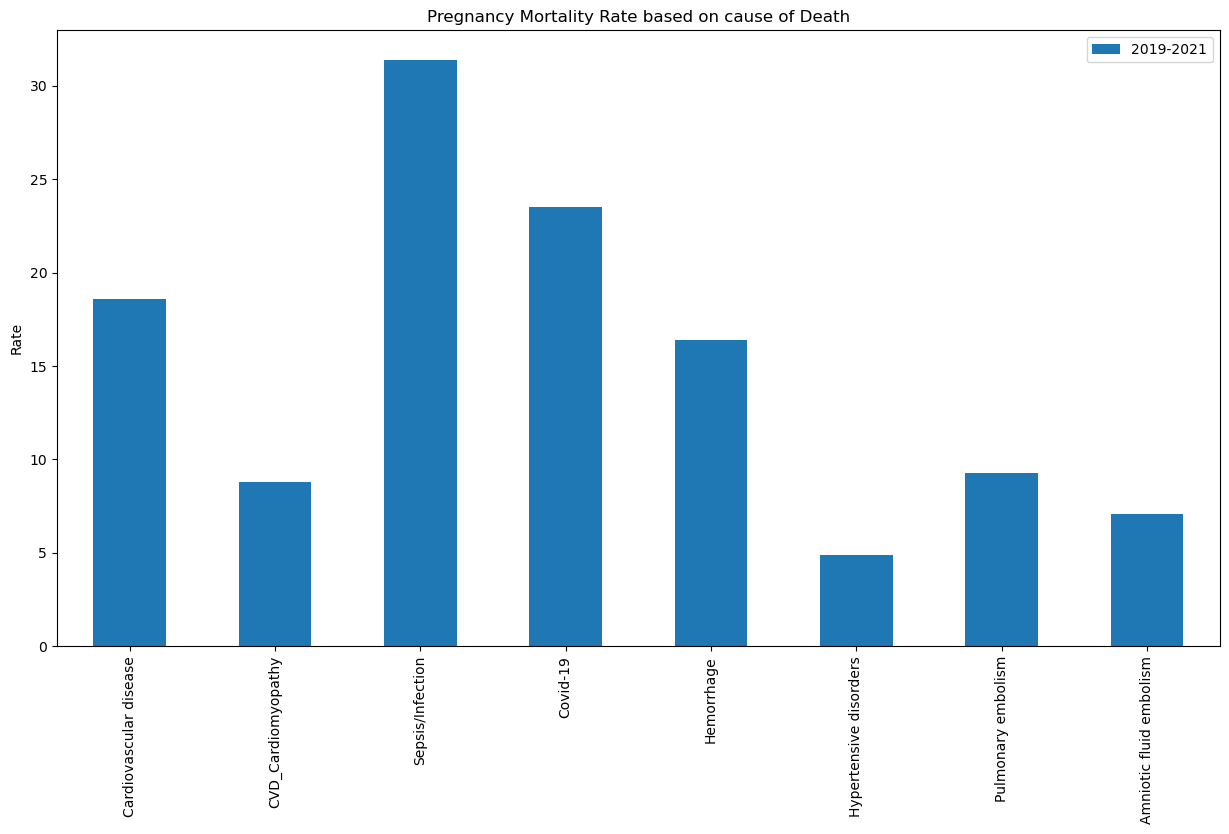

In [42]:
###### plotdata = pd.DataFrame({
   # "2018":[57,67,77,83],
    #"2019":[68,73,80,79],
    #"2020":[73,78,80,85]},
    #index=["Django", "Gafur", "Tommy", "Ronnie"])
#plotdata.plot(kind='bar', stacked=True,figsize=(15, 8))           
#plotdata.plot(kind='bar', stacked=True,figsize=(15, 8))           	

#plt.title("FIFA ratings")
plotdata = pd.DataFrame({
   # "2009-2011":[3.8,3.2,1.9,1.8,1.4,0.7,0],
    #"2010-2012":[3.4,1.2,1.8,1.5,1.5,0.8,0],
    #"2011-2013":[2.8,1.3,1.7,1.6,1.1,0.9,0],
    #"2012-2014":[2.9,1.4,1.7,1.5,0,0.9,0],
    #"2013-2015":[3.6,1.8,1.6,1.6,0,0.8,0],
    #"2014-2016":[4,2,2,1.7,0.8,0.7,0],
    #"2015-2017":[4.5,2.1,1.9,1.4,1.1,0.8,0],
    #"2016-2018":[4.5,2,2.3,1.1,1,1.3,0.7],
    #"2017-2019":[4.4,2,2,0,1.2,1.4,0.7],
    #"2018-2020":[4,2.6,2.7,0.8,1.7,1.4,0],
    "2019-2021":[18.6,8.8,31.4,23.5,16.4,4.9,9.3,7.1]},            
index=["Cardiovascular disease","CVD_Cardiomyopathy","Sepsis/Infection","Covid-19","Hemorrhage","Hypertensive disorders","Pulmonary embolism","Amniotic fluid embolism",])
plotdata.plot(kind='bar',stacked=True,figsize=(15, 8))
#plt.xlabel('Drug Regimen')
plt.ylabel('Rate')
plt.title("Pregnancy Mortality Rate based on cause of Death")



In [60]:
category_age=df.loc[(df["Category"] == "Age"),:] #| (df["Indicator Name"] == "Pregnancy-Related Mortality Ratio"),:]
#print(category_race)
category_age.head(10)

,Category,Subcategory,Numerator,Denominator,Rate
Year,,,,,
2009-2011,Age,<20 years,13,130673.0,9.9
2009-2011,Age,20-24 years,24,324590.0,7.4
2009-2011,Age,25-29 years,57,412024.0,13.8
2009-2011,Age,30-34 years,64,390298.0,16.4
2009-2011,Age,35-39 years,41,220442.0,18.6
2009-2011,Age,40+ years,28,60555.0,46.2
2010-2012,Age,<20 years,10,117595.0,8.5
2010-2012,Age,20-24 years,20,311754.0,6.4
2010-2012,Age,25-29 years,41,404810.0,10.1


Text(0.5, 1.0, 'Pregnancy Mortality Rate based on Age')

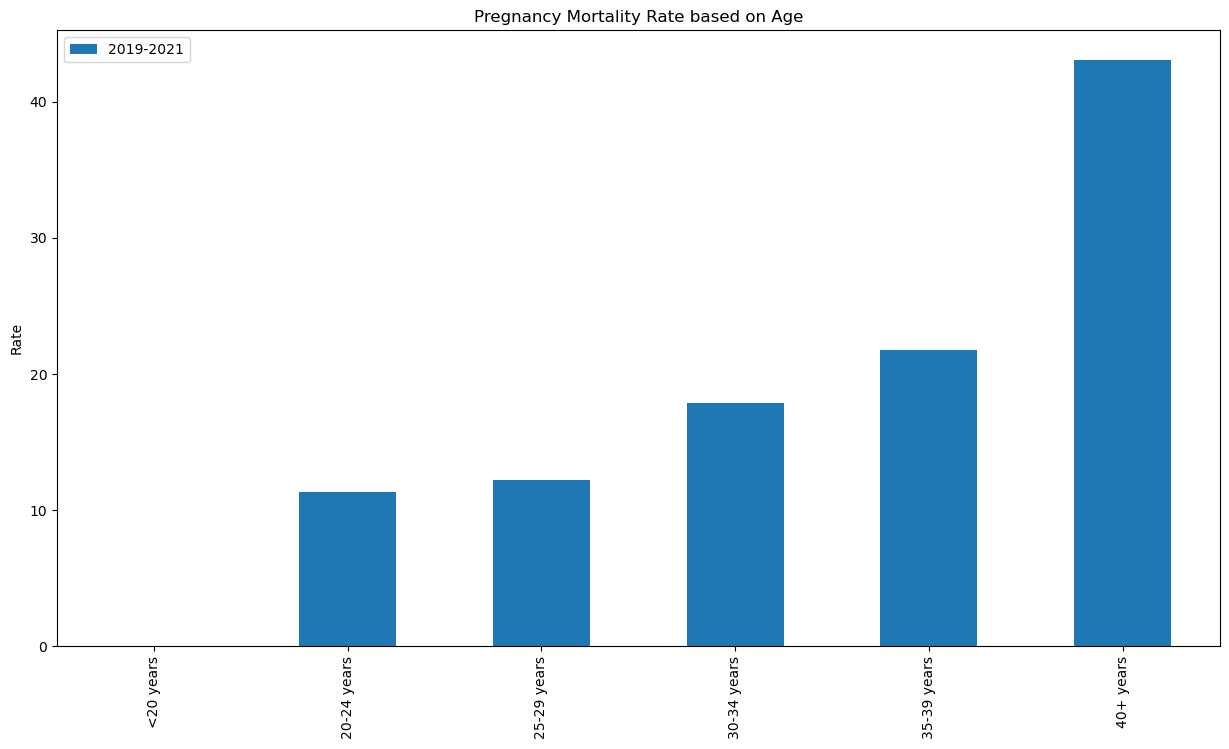

In [67]:

plotdata = pd.DataFrame({
   # "2009-2011":[9.9,7.4,13.8,16.4,18.6,46.2],
    #"2010-2012":[8.5,6.4,10.1,12.6,19,35.7],
    #"2011-2013":[0,6.6,9,11.7,17.3,25.6],
    #"2012-2014":[0,7.5,5.5,10,20.1,34.7],
    #"2013-2015":[0,8.9,6.9,10.2,19.6,42.1],
    #"2014-2016":[0,9.7,8.7,10.3,22.2,41.6],
    #"2015-2017":[0,9.6,11.2,11.5,18.6,37.9],
    #"2016-2018":[0,8.6,12.8,11.9,21,36.2],
    #"2017-2019":[0,9.8,10.9,11.9,19.7,34.1],
    #"2018-2020":[0,10.1,10.5,15.6,23.3,29.8],
   "2019-2021":[0,11.3,12.2,17.9,21.8,43.1]},            
index = ["<20 years","20-24 years","25-29 years","30-34 years","35-39 years","40+ years"])#plotdata.plot(kind='pie', autopct= "%0.1f%%", labels = index)
#plt.xlabel('Drug Regimen')
plotdata.plot(kind='bar',stacked=True,figsize=(15, 8))
plt.ylabel('Rate')
plt.title("Pregnancy Mortality Rate based on Age")
 

In [29]:
category_timingtodeath=df.loc[(df["Category"] == "Timing to Death"),:] #| (df["Indicator Name"] == "Pregnancy-Related Mortality Ratio"),:]
#print(category_race)
category_timingtodeath.head(10)

,Indicator Name,Category,Subcategory,Numerator,Denominator,Rate
Year,,,,,,
2009-2011,Percent Pregnancy-Related Mortality,Timing to Death,Pregnant - <20 weeks,31,227.0,13.7
2009-2011,Percent Pregnancy-Related Mortality,Timing to Death,Pregnant - 20+ weeks,16,227.0,7
2009-2011,Percent Pregnancy-Related Mortality,Timing to Death,Day of delivery,36,227.0,15.9
2009-2011,Percent Pregnancy-Related Mortality,Timing to Death,1-6 days,50,227.0,22
2009-2011,Percent Pregnancy-Related Mortality,Timing to Death,7-42 days,64,227.0,28.2
2009-2011,Percent Pregnancy-Related Mortality,Timing to Death,43-365 days,30,227.0,13.2
2010-2012,Percent Pregnancy-Related Mortality,Timing to Death,Pregnant - <20 weeks,30,185.0,16.2
2010-2012,Percent Pregnancy-Related Mortality,Timing to Death,Pregnant - 20+ weeks,17,185.0,9.2
2010-2012,Percent Pregnancy-Related Mortality,Timing to Death,Day of delivery,37,185.0,20


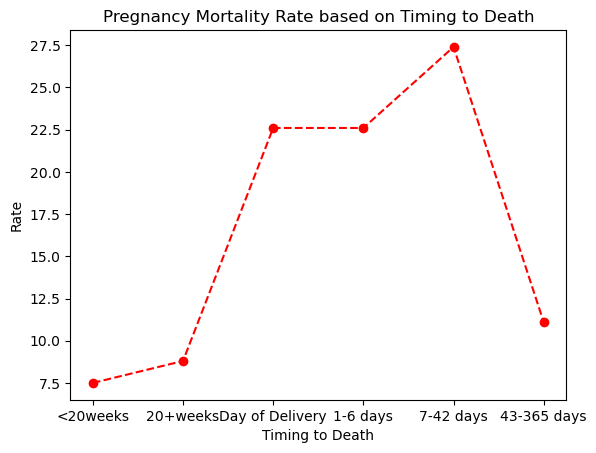

In [32]:
TimingtoDeath = ["<20weeks", "20+weeks", "Day of Delivery", "1-6 days", "7-42 days","43-365 days"]
Rate = [7.5,8.8,22.6,22.6,27.4,11.1]
plt.plot(TimingtoDeath, Rate, color= "red", marker="o", linestyle="--")
plt.xlabel("Timing to Death")
plt.ylabel("Rate")
plt.title("Pregnancy Mortality Rate based on Timing to Death")
plt.show()
         
	

In [62]:
category_race=df.loc[(df["Category"] == "Race-Ethnicity"),:] #| (df["Indicator Name"] == "Pregnancy-Related Mortality Ratio"),:]
#print(category_race)
category_race.head(10)

,Category,Subcategory,Numerator,Denominator,Rate
Year,,,,,
2009-2011,Race-Ethnicity,Hispanic,89,776897.0,11.5
2009-2011,Race-Ethnicity,Multi-Race,NaN,30711.0,NaN
2009-2011,Race-Ethnicity,Black,44,83397.0,52.8
2009-2011,Race-Ethnicity,AIAN,NaN,5701.0,NaN
2009-2011,Race-Ethnicity,Asian,22,185415.0,11.9
2009-2011,Race-Ethnicity,Pacific Islander,NaN,6785.0,NaN
2009-2011,Race-Ethnicity,White,67,421136.0,15.9
2009-2011,Race-Ethnicity,Other,NaN,990.0,NaN
2009-2011,Race-Ethnicity,Unknown,NaN,27744.0,NaN


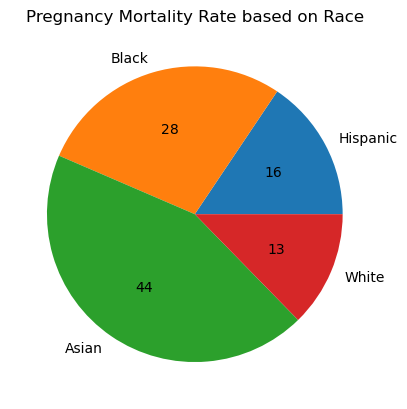

In [93]:
#plotdata = pd.DataFrame({
 #   "2009-2011":[11.5,52.8,11.9,15.9],
  #  "2010-2012":[9.2,45.5,11.5,13.2],
   # "2011-2013":[7.5,44.1,11.1,12.3],           
    #"2012-2014":[7.8,42.5,10.9,9.9],           		
    #"2013-2015":[8,58.6,12.2,10.2],                 	     		
    #"2014-2016":[11,57.6,12.8,9.6],
    #"2015-2017":[12.7,57.7,11.6,9.6],
    #"2016-2018":[13.7,49.1,14.5,11.3],
    #"2017-2019":[12.6,47.3,14,11.1],
    #"2018-2020":[14.8,45.8,15,12.6],                                        	

    #"2019-2021":[Rate=[]]},                                                   
                                                               # sex_label = male_v_female.index.values
#count_value = male_v_female.values
#plt.ylabel("Sex")
#plt.pie(count_value, labels = sex_label, autopct="%1.00f%%")
#plt.show()


#index=["Hispanic","Black", "Asian","White"])
#plotdata.plot(kind='bar',stacked=True,figsize=(15, 8))
#plt.xlabel('Drug Regimen')
#plt.ylabel('Rate')
#plt.title("Pregnancy Mortality Rate based on Race")

#Race = ["Hispanic", "Black", "Asian", "White"]
#Rate = [17.7,49.7,14.4,14]
#plt.plot(Race, Rate, color= "red", marker="o", linestyle="--")
#plt.xlabel("Race")
#plt.ylabel("Rate")
#plt.title("Pregnancy Mortality Rate based on Race")
#plt.show()
Race=["Hispanic","Black", "Asian","White"]
Rate=[17.7,31.7,49.7,14.4]
plt.pie(Rate, labels = Race, autopct="%1.0f") 
#plt.legend()
#plt.legend(title = "Race:")
plt.title("Pregnancy Mortality Rate based on Race")
plt.show()

In [59]:
category_healthinsurance=df.loc[(df["Category"] == "Health Insurance"),:]# | (df["Indicator Name"] == "Pregnancy-Related Mortality Ratio"),:]
print(category_healthinsurance)
#category_healthinsurance.tail()

                              Indicator Name          Category  \
Year                                                             
2009-2011  Pregnancy-Related Mortality Ratio  Health Insurance   
2009-2011  Pregnancy-Related Mortality Ratio  Health Insurance   
2009-2011  Pregnancy-Related Mortality Ratio  Health Insurance   
2009-2011  Pregnancy-Related Mortality Ratio  Health Insurance   
2010-2012  Pregnancy-Related Mortality Ratio  Health Insurance   
2010-2012  Pregnancy-Related Mortality Ratio  Health Insurance   
2010-2012  Pregnancy-Related Mortality Ratio  Health Insurance   
2010-2012  Pregnancy-Related Mortality Ratio  Health Insurance   
2011-2013  Pregnancy-Related Mortality Ratio  Health Insurance   
2011-2013  Pregnancy-Related Mortality Ratio  Health Insurance   
2011-2013  Pregnancy-Related Mortality Ratio  Health Insurance   
2011-2013  Pregnancy-Related Mortality Ratio  Health Insurance   
2012-2014  Pregnancy-Related Mortality Ratio  Health Insurance   
2012-2014 

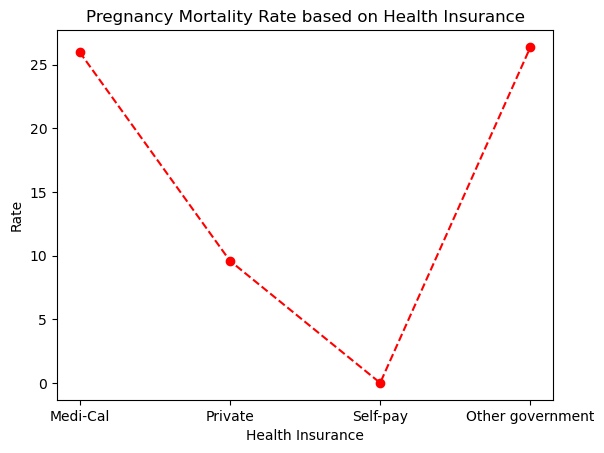

In [77]:
#plotdata = pd.DataFrame({
  #  "2009-2011":[16.5,9.7,31.4,24.9],
   # "2010-2012":[13.1,8.4,29,0],
    #"2011-2013":[11.7,8.7,0,0],           
    #"2012-2014":[10.6,8.8,15.5,0],           		
    #"2013-2015":[13.2,8.9,14.4,0],                 	     		
    #"2014-2016":[15.7,8.8,16.2,0],
    #"2015-2017":[16.5,9.8,0,0],
    #"2016-2018":[16.9,10.7,0,31],
    #"2017-2019":[17.5,9.5,0,27.5],
    #"2018-2020":[22.2,8.3,20.5,33.3],
    #"2019-2021":[26,9.6,0,26.4]},            
#index=["Medi-Cal","Private","Self-pay","Other government"])
#plotdata.plot(kind='bar',stacked=True,figsize=(15, 10))
#plt.xlabel('Drug Regimen')
#plt.ylabel('Rate')
#plt.title("Pregnancy Mortality Rate based on Health Insurance")
insurance = ["Medi-Cal","Private","Self-pay","Other government"]
Rate = [26,9.6,0,26.4]
plt.plot(insurance, Rate, color= "red", marker="o", linestyle="--")
plt.xlabel("Health Insurance")
plt.ylabel("Rate")
plt.title("Pregnancy Mortality Rate based on Health Insurance")
plt.show()
#Race = ["Hispanic", "Black", "Asian", "White"]
#Rate = [17.7,49.7,14.4,14]
#plt.plot(Race, Rate, color= "red", marker="o", linestyle="--")
#plt.xlabel("Race")
#plt.ylabel("Rate")
#plt.title("Pregnancy Mortality Rate based on Race")
#plt.show()
         



In [81]:
#category_bmi=df.loc[(df["Category"] ==" Prepregnancy Body Mass Index"),:] 
#print(category_race)
#category_bmi.head()
category_bmi=df.loc[(df["Category"] == "Prepregnancy Body Mass Index"),:]
category_bmi.head()


,Category,Subcategory,Numerator,Denominator,Rate
Year,,,,,
2009-2011,Prepregnancy Body Mass Index,Underweight/Normal weight (<25),57,768410.0,7.4
2009-2011,Prepregnancy Body Mass Index,Overweight (25.0-29.9),50,371503.0,13.5
2009-2011,Prepregnancy Body Mass Index,Obese I/II (30-39.9),64,257189.0,24.9
2009-2011,Prepregnancy Body Mass Index,Obese III (40+),27,43671.0,61.8
2010-2012,Prepregnancy Body Mass Index,Underweight/Normal weight (<25),47,757322.0,6.2


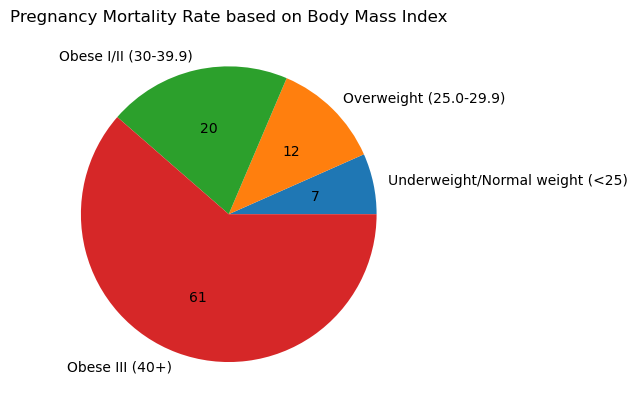

In [94]:
Bmi=["Underweight/Normal weight (<25)","Overweight (25.0-29.9)"	, "Obese I/II (30-39.9)","Obese III (40+)"]
Rate=[8.5,15.3,25.6,78.6]
plt.pie(Rate, labels = Bmi,autopct="%1.0f") 	
#plt.legend()
#plt.legend(title = "Bmi:")
plt.title("Pregnancy Mortality Rate based on Body Mass Index")
plt.show()

In [ ]:
sns.implot(x = 'Age',
           y = 'Rate',
           
           